In [1]:
import gym
from policy_gradient import PolicyGradient
import matplotlib.pyplot as plt

In [2]:
DISPLAY_REWARD_THRESHOLD = -2000
RENDER = False

In [3]:
env = gym.make('MountainCar-v0')
env = env.unwrapped

In [4]:
RL = PolicyGradient(n_actions=env.action_space.n, n_features=env.observation_space.shape[0], learning_rate=0.02, reward_decay=0.995)

episode: 0  reward: -4489
episode: 1  reward: -4607
episode: 2  reward: -4659
episode: 3  reward: -4638
episode: 4  reward: -4640
episode: 5  reward: -4622
episode: 6  reward: -4619
episode: 7  reward: -4607
episode: 8  reward: -4609
episode: 9  reward: -4581
episode: 10  reward: -4622
episode: 11  reward: -4656
episode: 12  reward: -4652
episode: 13  reward: -4660
episode: 14  reward: -4689
episode: 15  reward: -4653
episode: 16  reward: -4656
episode: 17  reward: -4669
episode: 18  reward: -4663
episode: 19  reward: -4655
episode: 20  reward: -4663
episode: 21  reward: -4631
episode: 22  reward: -4626
episode: 23  reward: -4590
episode: 24  reward: -4566
episode: 25  reward: -4544
episode: 26  reward: -4566
episode: 27  reward: -4538
episode: 28  reward: -4586
episode: 29  reward: -4592
episode: 30  reward: -4560


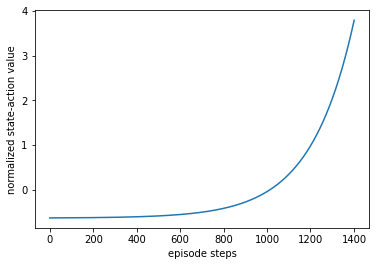

episode: 31  reward: -4553
episode: 32  reward: -4538
episode: 33  reward: -4502
episode: 34  reward: -4514
episode: 35  reward: -4529
episode: 36  reward: -4497
episode: 37  reward: -4479
episode: 38  reward: -4485
episode: 39  reward: -4477
episode: 40  reward: -4459
episode: 41  reward: -4452
episode: 42  reward: -4484
episode: 43  reward: -4474
episode: 44  reward: -4470
episode: 45  reward: -4522
episode: 46  reward: -4521
episode: 47  reward: -4500
episode: 48  reward: -4503
episode: 49  reward: -4477
episode: 50  reward: -4495
episode: 51  reward: -4476
episode: 52  reward: -4448
episode: 53  reward: -4448
episode: 54  reward: -4447
episode: 55  reward: -4431
episode: 56  reward: -4402
episode: 57  reward: -4429
episode: 58  reward: -4434
episode: 59  reward: -4507
episode: 60  reward: -4560
episode: 61  reward: -4546
episode: 62  reward: -4579
episode: 63  reward: -4554
episode: 64  reward: -4535
episode: 65  reward: -4510
episode: 66  reward: -4484
episode: 67  reward: -4488
e

In [5]:
for i_episode in range(1000):
	observation = env.reset()

	while True:
		if RENDER: env.render()

		action = RL.choose_action(observation)

		observation_, reward, done, info = env.step(action)

		RL.store_transition(observation, action, reward)

		if done:
			# calculate running reward
			ep_rs_sum = sum(RL.ep_rs)
			if 'running_reward' not in globals():
				running_reward = ep_rs_sum
			else:
				running_reward = running_reward * 0.99 + ep_rs_sum * 0.01

			if running_reward > DISPLAY_REWARD_THRESHOLD: RENDER = True

			print('episode:', i_episode, " reward:", int(running_reward))

			vt = RL.learn()

			if i_episode == 30:
				plt.plot(vt)
				plt.xlabel('episode steps')
				plt.ylabel('normalized state-action value')
				plt.show()

			break

		observation = observation_